In [50]:
import pandas as pd

In [51]:
df = pd.read_csv("C:/Users/hlmj3/Desktop/project/gangnam_cafe_2.csv", encoding='utf-8')
df

,name,review
0,한과와락,여기 개성주악 맛있어욤 벌써 2번째입니다\n강남에 이렇게 이쁜 카페 있는줄 몰랐다 ...
1,레뽀드라라 강남점,비엔나 커피 맛있어요\n유명한 스콘집이라고 왔어요 분위기도좋고 스콘도 맛있네요 특이...
2,한과와락,여기 개성주악 맛있어욤 벌써 2번째입니다\n강남에 이렇게 이쁜 카페 있는줄 몰랐다 ...
3,레뽀드라라 강남점,비엔나 커피 맛있어요\n유명한 스콘집이라고 왔어요 분위기도좋고 스콘도 맛있네요 특이...
4,스템커피 강남점,디저트 종류도 많고 카페도 깨끗해서 좋아요:)\n라떼 넘 맛있어엽! 전반적으로 달달...
...,...,...
103,빌리엔젤 강남358타워점,"강남역에 3곳중 이 곳으로 오게 되었는데 매우 별로네요, 그리고 네이버 이용시간으로..."
104,잠바주스 서초삼성타운점,굿\n매장에 들어가자마자 과일향이 화악~~~!\n굿\n직원분이 다소 친절하지 않음\...
105,어스마카롱,베이글 아메 세트 저렴해서 좋아요.\n마카롱 귀엽고 맛있어요\n꽈배기도 맛있고 베이...
106,시티갤러리카페 본점,"굿\n베이글이랑 커피 맛있어용\n아이스크림라떼, 단호박크로플, 리코타시티샐러드 이렇..."


In [52]:
# 'name' 열을 기준으로 중복 행 제거
df = df.drop_duplicates(subset=['name'])

In [53]:
# 'name' 열을 기준으로 중복 행 제거
df = df.drop_duplicates(subset=['review'])

In [54]:
df

,name,review
0,한과와락,여기 개성주악 맛있어욤 벌써 2번째입니다\n강남에 이렇게 이쁜 카페 있는줄 몰랐다 ...
1,레뽀드라라 강남점,비엔나 커피 맛있어요\n유명한 스콘집이라고 왔어요 분위기도좋고 스콘도 맛있네요 특이...
4,스템커피 강남점,디저트 종류도 많고 카페도 깨끗해서 좋아요:)\n라떼 넘 맛있어엽! 전반적으로 달달...
5,알베르,대화\n복잡한 강남 한복판에 이런 공간이 있다니!!\n공간이 넓어서 여유있고 편해요...
6,호랑가시,맛있어요. ㅎㅎㅎ \n일단 대형카페여서 너무좋고 빵들도 특이한게 많아요 맛도 좋고 ...
...,...,...
103,빌리엔젤 강남358타워점,"강남역에 3곳중 이 곳으로 오게 되었는데 매우 별로네요, 그리고 네이버 이용시간으로..."
104,잠바주스 서초삼성타운점,굿\n매장에 들어가자마자 과일향이 화악~~~!\n굿\n직원분이 다소 친절하지 않음\...
105,어스마카롱,베이글 아메 세트 저렴해서 좋아요.\n마카롱 귀엽고 맛있어요\n꽈배기도 맛있고 베이...
106,시티갤러리카페 본점,"굿\n베이글이랑 커피 맛있어용\n아이스크림라떼, 단호박크로플, 리코타시티샐러드 이렇..."


### 한글 텍스트로 전처리

In [55]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

### 숫자, 영어 등 필요하지 않은 문자 및 이모티콘 제거

In [56]:
# import re

# # 텍스트 정제 함수 : 한글과 숫자만 남기고 나머지 문자는 제거
# def text_cleaning(text):
#     # 한글의 정규표현식으로 한글과 숫자만 추출
#     hangul_and_numbers = re.compile('[^ ㄱ-ㅣ가-힣0-9]+')
#     result = hangul_and_numbers.sub('', str(text))
#     return result

In [57]:
# 텍스트 정제 함수 : 한글만 남기고 나머지 문자는 제거
import re

def text_cleaning(text):
    # 한글의 정규표현식으로 한글만 추출
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', str(text))

    # 'ㅎㅎㅎ'과 같은 패턴 제거
    result = re.sub('ㅎ+', '', result)
    
    return result

In [58]:
# 함수를 적용하여 리뷰해서 한글만 추출
df['ko_text'] = df['review'].apply(lambda x: text_cleaning(x))
del df['review']
df.head()

,name,ko_text
0,한과와락,여기 개성주악 맛있어욤 벌써 번째입니다강남에 이렇게 이쁜 카페 있는줄 몰랐다 했더니...
1,레뽀드라라 강남점,비엔나 커피 맛있어요유명한 스콘집이라고 왔어요 분위기도좋고 스콘도 맛있네요 특이한 ...
4,스템커피 강남점,디저트 종류도 많고 카페도 깨끗해서 좋아요라떼 넘 맛있어엽 전반적으로 달달한 맛이 ...
5,알베르,대화복잡한 강남 한복판에 이런 공간이 있다니공간이 넓어서 여유있고 편해요아메리카노가...
6,호랑가시,맛있어요 일단 대형카페여서 너무좋고 빵들도 특이한게 많아요 맛도 좋고 커피맛도 아...


### 형태소 단위로 추출

In [59]:
import os
os.environ['JAVA_HOME'] = 'C:\\Program Files\\Java\\jdk-21' 

In [60]:
from konlpy.tag import Okt

okt = Okt()

In [61]:
from konlpy.tag import Okt

# konlpy라이브러리로 텍스트 데이터에서 형태소를 추출합니다.
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

# 형태소 추출 동작을 테스트합니다.
result = get_pos(df['ko_text'][0])
print(result)

['여기/Noun', '개성/Noun', '주악/Noun', '맛있어/Adjective', '욤/Noun', '벌써/Noun', '번/Noun', '째/Suffix', '입니다/Adjective', '강남/Noun', '에/Josa', '이렇게/Adverb', '이쁜/Adjective', '카페/Noun', '있는줄/Adjective', '몰랐다/Verb', '했더니/Verb', '지난달/Noun', '에/Josa', '오픈/Noun', '했더라구요/Verb', '경치/Noun', '도/Josa', '좋구/Adjective', '차/Noun', '향/Noun', '도/Josa', '좋구/Adjective', '인테리어/Noun', '도/Josa', '너무/Adverb', '잘/VerbPrefix', '했어요/Verb', '다만/Noun', '공간/Noun', '이/Josa', '막/Noun', '넓/Adjective', '직/Noun', '넓/Adjective', '직하진/Adjective', '않아서/Verb', '계단/Noun', '을/Josa', '좀/Noun', '올랐구/Verb', '풍경/Noun', '바람/Noun', '불면/Noun', '찰랑/Noun', '찰랑하는/Adjective', '소리내는이/Verb', '있으면/Adjective', '참/Verb', '좋겠다는/Adjective', '생각/Noun', '이/Josa', '들었어요/Verb', '기분/Noun', '좋은/Adjective', '식후차/Noun', '하고/Verb', '갑니답/Verb', '다음/Noun', '엔/Josa', '여자친구/Noun', '데려올게요/Verb', '정성/Noun', '스럽게/Josa', '주는/Verb', '차/Noun', '맛있네/Adjective', '요약/Noun', '과는/Josa', '너무/Adverb', '달아요/Verb', '공장/Noun', '형/Suffix', '약과/Noun', '와는/Josa', '다른/Noun', '개성/Noun'

In [62]:
result

['여기/Noun',
 '개성/Noun',
 '주악/Noun',
 '맛있어/Adjective',
 '욤/Noun',
 '벌써/Noun',
 '번/Noun',
 '째/Suffix',
 '입니다/Adjective',
 '강남/Noun',
 '에/Josa',
 '이렇게/Adverb',
 '이쁜/Adjective',
 '카페/Noun',
 '있는줄/Adjective',
 '몰랐다/Verb',
 '했더니/Verb',
 '지난달/Noun',
 '에/Josa',
 '오픈/Noun',
 '했더라구요/Verb',
 '경치/Noun',
 '도/Josa',
 '좋구/Adjective',
 '차/Noun',
 '향/Noun',
 '도/Josa',
 '좋구/Adjective',
 '인테리어/Noun',
 '도/Josa',
 '너무/Adverb',
 '잘/VerbPrefix',
 '했어요/Verb',
 '다만/Noun',
 '공간/Noun',
 '이/Josa',
 '막/Noun',
 '넓/Adjective',
 '직/Noun',
 '넓/Adjective',
 '직하진/Adjective',
 '않아서/Verb',
 '계단/Noun',
 '을/Josa',
 '좀/Noun',
 '올랐구/Verb',
 '풍경/Noun',
 '바람/Noun',
 '불면/Noun',
 '찰랑/Noun',
 '찰랑하는/Adjective',
 '소리내는이/Verb',
 '있으면/Adjective',
 '참/Verb',
 '좋겠다는/Adjective',
 '생각/Noun',
 '이/Josa',
 '들었어요/Verb',
 '기분/Noun',
 '좋은/Adjective',
 '식후차/Noun',
 '하고/Verb',
 '갑니답/Verb',
 '다음/Noun',
 '엔/Josa',
 '여자친구/Noun',
 '데려올게요/Verb',
 '정성/Noun',
 '스럽게/Josa',
 '주는/Verb',
 '차/Noun',
 '맛있네/Adjective',
 '요약/Noun',
 '과는/Josa',
 '너무/Adverb',
 '달

In [63]:
# 형태소 분석 결과를 리스트로 만들어줍니다.
tagger = Okt()
morphs_result = tagger.morphs(' '.join(result))
morphs_result

['여기',
 '/',
 'Noun',
 '개성',
 '/',
 'Noun',
 '주악',
 '/',
 'Noun',
 '맛있어',
 '/',
 'Adjective',
 '욤',
 '/',
 'Noun',
 '벌써',
 '/',
 'Noun',
 '번',
 '/',
 'Noun',
 '째',
 '/',
 'Suffix',
 '입니다',
 '/',
 'Adjective',
 '강남',
 '/',
 'Noun',
 '에',
 '/',
 'Josa',
 '이렇게',
 '/',
 'Adverb',
 '이쁜',
 '/',
 'Adjective',
 '카페',
 '/',
 'Noun',
 '있는줄',
 '/',
 'Adjective',
 '몰랐다',
 '/',
 'Verb',
 '했더니',
 '/',
 'Verb',
 '지난달',
 '/',
 'Noun',
 '에',
 '/',
 'Josa',
 '오픈',
 '/',
 'Noun',
 '했더라구요',
 '/',
 'Verb',
 '경치',
 '/',
 'Noun',
 '도',
 '/',
 'Josa',
 '좋구',
 '/',
 'Adjective',
 '차',
 '/',
 'Noun',
 '향',
 '/',
 'Noun',
 '도',
 '/',
 'Josa',
 '좋구',
 '/',
 'Adjective',
 '인테리어',
 '/',
 'Noun',
 '도',
 '/',
 'Josa',
 '너무',
 '/',
 'Adverb',
 '잘',
 '/',
 'VerbPrefix',
 '했어요',
 '/',
 'Verb',
 '다만',
 '/',
 'Noun',
 '공간',
 '/',
 'Noun',
 '이',
 '/',
 'Josa',
 '막',
 '/',
 'Noun',
 '넓',
 '/',
 'Adjective',
 '직',
 '/',
 'Noun',
 '넓',
 '/',
 'Adjective',
 '직하진',
 '/',
 'Adjective',
 '않아서',
 '/',
 'Verb',
 '계단',
 '/',
 'Noun'

In [64]:
nouns_result = tagger.nouns(' '.join(result))
nouns_result

['여기',
 '개성',
 '주악',
 '욤',
 '벌써',
 '번',
 '강남',
 '카페',
 '지난달',
 '오픈',
 '경치',
 '도',
 '차',
 '향',
 '도',
 '인테리어',
 '도',
 '다만',
 '공간',
 '이',
 '막',
 '직',
 '계단',
 '좀',
 '풍경',
 '바람',
 '불면',
 '찰랑',
 '생각',
 '이',
 '기분',
 '식후차',
 '다음',
 '여자친구',
 '정성',
 '차',
 '요약',
 '공장',
 '형',
 '약과',
 '다른',
 '개성',
 '약과',
 '달',
 '맛',
 '의',
 '양갱',
 '도',
 '수제',
 '라서',
 '입',
 '다시',
 '방문',
 '주악',
 '도',
 '해',
 '요',
 '주악',
 '메뉴',
 '은',
 '다른',
 '메뉴',
 '은',
 '다소',
 '기본',
 '주악',
 '번',
 '더',
 '한과',
 '디저트',
 '여기',
 '진짜',
 '존맛',
 '주말',
 '갓',
 '더니',
 '자리',
 '하나',
 '두',
 '포장',
 '가게',
 '안도',
 '음료',
 '도',
 '잔',
 '담',
 '평일',
 '방문',
 '주악',
 '주악',
 '이',
 '습',
 '개성',
 '주',
 '악의',
 '인식',
 '이',
 '곳',
 '백화점',
 '때',
 '기름',
 '냄새',
 '나',
 '고',
 '달기',
 '만',
 '왜',
 '쫄깃달콤',
 '고소',
 '세',
 '박자',
 '해도',
 '가격',
 '이',
 '제공',
 '더',
 '나',
 '만',
 '곳',
 '개성',
 '주악',
 '이',
 '맛',
 '거',
 '얼마',
 '안',
 '개성',
 '주악',
 '안',
 '봄',
 '처음',
 '개성',
 '주악',
 '은',
 '찹쌀떡',
 '맛',
 '이',
 '그',
 '조금',
 '더',
 '쫀득바싹꾸덕',
 '달',
 '원래',
 '양갱',
 '도',
 '별로',
 '안',
 '이름',
 '얼그레이',
 

In [65]:
# 형태소 분석 수행
morphs_result = tagger.morphs(' '.join(result))

# 조사와 접속사를 제외한 형태소만 추출
filtered_morphs = [word for word in morphs_result if word not in ('Josa', 'Conjunction')]

# 형태소 리스트를 문자열로 변환
filtered_text = ' '.join(filtered_morphs)
filtered_text

'여기 / Noun 개성 / Noun 주악 / Noun 맛있어 / Adjective 욤 / Noun 벌써 / Noun 번 / Noun 째 / Suffix 입니다 / Adjective 강남 / Noun 에 / 이렇게 / Adverb 이쁜 / Adjective 카페 / Noun 있는줄 / Adjective 몰랐다 / Verb 했더니 / Verb 지난달 / Noun 에 / 오픈 / Noun 했더라구요 / Verb 경치 / Noun 도 / 좋구 / Adjective 차 / Noun 향 / Noun 도 / 좋구 / Adjective 인테리어 / Noun 도 / 너무 / Adverb 잘 / VerbPrefix 했어요 / Verb 다만 / Noun 공간 / Noun 이 / 막 / Noun 넓 / Adjective 직 / Noun 넓 / Adjective 직하진 / Adjective 않아서 / Verb 계단 / Noun 을 / 좀 / Noun 올랐구 / Verb 풍경 / Noun 바람 / Noun 불면 / Noun 찰랑 / Noun 찰랑하는 / Adjective 소리내는이 / Verb 있으면 / Adjective 참 / Verb 좋겠다는 / Adjective 생각 / Noun 이 / 들었어요 / Verb 기분 / Noun 좋은 / Adjective 식후차 / Noun 하고 / Verb 갑니답 / Verb 다음 / Noun 엔 / 여자친구 / Noun 데려올게요 / Verb 정성 / Noun 스럽게 / 주는 / Verb 차 / Noun 맛있네 / Adjective 요약 / Noun 과는 / 너무 / Adverb 달아요 / Verb 공장 / Noun 형 / Suffix 약과 / Noun 와는 / 다른 / Noun 개성 / Noun 약과 / Noun 가 / 달 / Noun 지 / 않아 / Verb 너무 / Adverb 좋았습니다 / Adjective 다양한 / Adjective 맛 / Noun 의 / 양갱 / Noun 도 / 수제 / Noun 라서 / 그런지 / Adjective

In [66]:
from konlpy.tag import Okt

# konlpy 라이브러리로 텍스트 데이터에서 형태소를 추출하고 조사와 접속사를 제거합니다.
def get_filtered_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word, tag) for word, tag in pos if tag not in ['Josa', 'Conjunction']]
    return pos

# 텍스트 데이터를 가져와서 형태소 추출 및 조사, 접속사 제거 동작을 테스트
text_to_analyze = df['ko_text'][0]
result = get_filtered_pos(text_to_analyze)

# 형태소와 품사를 출력
for item in result:
    print(item)

여기/Noun
개성/Noun
주악/Noun
맛있어/Adjective
욤/Noun
벌써/Noun
번/Noun
째/Suffix
입니다/Adjective
강남/Noun
이렇게/Adverb
이쁜/Adjective
카페/Noun
있는줄/Adjective
몰랐다/Verb
했더니/Verb
지난달/Noun
오픈/Noun
했더라구요/Verb
경치/Noun
좋구/Adjective
차/Noun
향/Noun
좋구/Adjective
인테리어/Noun
너무/Adverb
잘/VerbPrefix
했어요/Verb
다만/Noun
공간/Noun
막/Noun
넓/Adjective
직/Noun
넓/Adjective
직하진/Adjective
않아서/Verb
계단/Noun
좀/Noun
올랐구/Verb
풍경/Noun
바람/Noun
불면/Noun
찰랑/Noun
찰랑하는/Adjective
소리내는이/Verb
있으면/Adjective
참/Verb
좋겠다는/Adjective
생각/Noun
들었어요/Verb
기분/Noun
좋은/Adjective
식후차/Noun
하고/Verb
갑니답/Verb
다음/Noun
여자친구/Noun
데려올게요/Verb
정성/Noun
주는/Verb
차/Noun
맛있네/Adjective
요약/Noun
너무/Adverb
달아요/Verb
공장/Noun
형/Suffix
약과/Noun
다른/Noun
개성/Noun
약과/Noun
달/Noun
않아/Verb
너무/Adverb
좋았습니다/Adjective
다양한/Adjective
맛/Noun
양갱/Noun
수제/Noun
그런지/Adjective
부드럽고/Adjective
입/Noun
딱/Adverb
맞았어요/Verb
다시/Noun
방문/Noun
해서/Verb
주악/Noun
먹어/Verb
보려고/Verb
해/Noun
주악/Noun
메뉴/Noun
들/Suffix
다/Adverb
맛있는데/Adjective
다른/Noun
메뉴/Noun
들/Suffix
다소/Noun
평범하게/Adjective
느껴졌습니다/Verb
기본/Noun
주악/Noun
사러/Verb
한/V

In [67]:
from konlpy.tag import Okt

okt = Okt()

# 형태소와 품사를 추출
pos_result = okt.pos(' '.join(result))

# 형용사만 추출
adjectives = [word for word, pos in pos_result if pos == 'Adjective']

# 추출된 형용사 출력
print(f'추출된 형용사: {adjectives}')

추출된 형용사: ['맛있어', '입니다', '이쁜', '있는줄', '좋구', '좋구', '넓', '넓', '직하진', '찰랑하는', '있으면', '좋겠다는', '좋은', '맛있네', '좋았습니다', '다양한', '그런지', '부드럽고', '맛있는데', '평범하게', '맛있어요', '없어서', '예쁘구', '예쁜', '아쉬워용', '맛있어용', '있어요', '맛있', '좋아요', '입니다이전에', '작긴', '사악하지', '좋았어요', '좋았어요', '같은', '좋았다', '좋아하는데', '맛있게', '맛있다하는', '맛있는데의', '있어서', '맛있게', '맛있었고요', '기대하지', '맛있어서', '좋았습니다', '괜찮았고', '낮고', '있었습니다', '다양하게', '좋습니다', '기대하며', '가볍게', '좋았고', '맛있고', '신선한지', '맛있어요', '친절하게', '입니다', '조용해서', '좋아요', '비싸지만', '맛있네요', '신기한', '건강한', '맛있었던', '좋은', '맛있어요', '많아', '차분해서', '좋구', '맛있었어요', '만족스러웠어요', '뜨거운', '그랬어용', '있어서', '있길래', '궁금했는데', '없어', '슬펐는데', '친절하시구', '있으면', '맛있어요', '깔끔하고', '맛있고', '적당히', '맛있어요', '좋아할', '이쁘', '맛있었어요', '좋고', '편안해요', '만족스러워요', '예뻐서', '좋을', '같아요', '맛있었어요', '맛있었고', '맛있어서', '조용할', '입니다', '맛있는', '조용히', '좋습니다', '없고', '없는', '다양한', '행복해지는', '이런', '있을', '예쁜', '같은', '작은', '있음', '예쁘게', '안좋아요', '안된', '좋아하는데', '맛있고', '친절하세요', '같네용', '친절하시고', '좋아하던', '다양한', '있고', '맛있어', '많았어요', '좋을듯', '깔끔하고', '친절하구', '있', '옛스러운', '있는', '따뜻한', '다

#### df 에 조사, 접속사 제거한 거 반영하기

In [68]:
from konlpy.tag import Okt

# konlpy 라이브러리로 텍스트 데이터에서 형태소를 추출하고 조사와 접속사를 제거합니다.
def get_filtered_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}'.format(word) for word, tag in pos if tag not in ['Josa', 'Conjunction']]
    return ' '.join(pos)  # 형태소를 스페이스로 구분된 문자열로 반환

# 텍스트 데이터를 가져와서 형태소 추출 및 조사, 접속사 제거 동작을 테스트
text_to_analyze = df['ko_text'][0]

# 형태소 추출 및 조사, 접속사 제거된 결과를 다시 'df' 데이터프레임에 할당
df['filtered_text'] = [get_filtered_pos(text) for text in df['ko_text']]

In [69]:
df

,name,ko_text,filtered_text
0,한과와락,여기 개성주악 맛있어욤 벌써 번째입니다강남에 이렇게 이쁜 카페 있는줄 몰랐다 했더니...,여기 개성 주악 맛있어 욤 벌써 번 째 입니다 강남 이렇게 이쁜 카페 있는줄 몰랐다...
1,레뽀드라라 강남점,비엔나 커피 맛있어요유명한 스콘집이라고 왔어요 분위기도좋고 스콘도 맛있네요 특이한 ...,비엔나 커피 맛있어요 유명한 스콘 집 왔어요 분위기 좋고 스콘 맛있네요 특이한 스콘...
4,스템커피 강남점,디저트 종류도 많고 카페도 깨끗해서 좋아요라떼 넘 맛있어엽 전반적으로 달달한 맛이 ...,디저트 종류 많고 카페 깨끗해서 좋아요 라떼 넘 맛있어 엽 전반 적 달달 맛 있어여...
5,알베르,대화복잡한 강남 한복판에 이런 공간이 있다니공간이 넓어서 여유있고 편해요아메리카노가...,대화 복잡한 강남 한 복판 이런 공간 있다니 공간 넓어서 여유 있고 편해요 아메리카...
6,호랑가시,맛있어요 일단 대형카페여서 너무좋고 빵들도 특이한게 많아요 맛도 좋고 커피맛도 아...,맛있어요 일단 대형 카페 너무 좋고 빵 들 특이한게 많아요 맛 좋고 커피 맛 아주 ...
...,...,...,...
103,빌리엔젤 강남358타워점,강남역에 곳중 이 곳으로 오게 되었는데 매우 별로네요 그리고 네이버 이용시간으로는 ...,강남역 곳 중 이 곳 오게 되었는데 매우 별로 네 네이버 이용 시간 마감 라스트 오...
104,잠바주스 서초삼성타운점,굿매장에 들어가자마자 과일향이 화악굿직원분이 다소 친절하지 않음좋아요제로페이가 키오...,굿 매장 들어가자마자 과일 향 화악굿 직원 분 다소 친절하지 않음 좋아요 제로 페이...
105,어스마카롱,베이글 아메 세트 저렴해서 좋아요마카롱 귀엽고 맛있어요꽈배기도 맛있고 베이글도 좋아...,베이글 아메 세트 저렴해서 좋아요 마카롱 귀엽고 맛있어요 꽈배기 맛있고 베이글 좋아...
106,시티갤러리카페 본점,굿베이글이랑 커피 맛있어용아이스크림라떼 단호박크로플 리코타시티샐러드 이렇게 먹었는데...,굿 베이글 커피 맛있어용 아이스크림 라떼 단호박 크로 플 리코 타 시티 샐러드 이렇...


In [70]:
# 'ko_text' 열을 데이터프레임에서 삭제
df.drop('ko_text', axis=1, inplace=True)

In [71]:
df

,name,filtered_text
0,한과와락,여기 개성 주악 맛있어 욤 벌써 번 째 입니다 강남 이렇게 이쁜 카페 있는줄 몰랐다...
1,레뽀드라라 강남점,비엔나 커피 맛있어요 유명한 스콘 집 왔어요 분위기 좋고 스콘 맛있네요 특이한 스콘...
4,스템커피 강남점,디저트 종류 많고 카페 깨끗해서 좋아요 라떼 넘 맛있어 엽 전반 적 달달 맛 있어여...
5,알베르,대화 복잡한 강남 한 복판 이런 공간 있다니 공간 넓어서 여유 있고 편해요 아메리카...
6,호랑가시,맛있어요 일단 대형 카페 너무 좋고 빵 들 특이한게 많아요 맛 좋고 커피 맛 아주 ...
...,...,...
103,빌리엔젤 강남358타워점,강남역 곳 중 이 곳 오게 되었는데 매우 별로 네 네이버 이용 시간 마감 라스트 오...
104,잠바주스 서초삼성타운점,굿 매장 들어가자마자 과일 향 화악굿 직원 분 다소 친절하지 않음 좋아요 제로 페이...
105,어스마카롱,베이글 아메 세트 저렴해서 좋아요 마카롱 귀엽고 맛있어요 꽈배기 맛있고 베이글 좋아...
106,시티갤러리카페 본점,굿 베이글 커피 맛있어용 아이스크림 라떼 단호박 크로 플 리코 타 시티 샐러드 이렇...


```
 Konlpy의 Okt (Open Korean Text) 형태소 분석기는 'noun'으로 인식한 경우에 대해 단어를 분리하기 때문에, 
 사용자가 원하는 단어 결합을 위해 자체적인 후처리를 수행해야 합니다.

하지만, 다른 한글 형태소 분석기, 예를 들어, KoNLPy의 Hannanum 형태소 분석기는 
'Noun 개성 / Noun 주악'을 'Noun 개성 주악'으로 자동 결합하는 경향이 있습니다. 
```

In [144]:
from konlpy.tag import Hannanum

# 예시 문장
text = "Noun 개성 / Noun 주악"

# Hannanum 형태소 분석기 초기화
tagger = Hannanum()

# 형태소 분석 수행
morphs_result = tagger.morphs(text)

# 형태소 리스트를 문자열로 변환
filtered_text = ' '.join(morphs_result)
filtered_text

'Noun 개성 / Noun 주악'

In [145]:
from konlpy.tag import Okt

okt = Okt()

morphs_result = tagger.morphs(' '.join(result))
ps_result = tagger.pos(' '.join(result))
noun_result = tagger.nouns(' '.join(result))

print(f'OKT 형태소 분석 : {morphs_result}')
print(f'OKT 품사 태깅 : {ps_result}')
print(f'OKT 명사 추출 : {noun_result}')

OKT 형태소 분석 : ['여기', '/', 'Noun', '개성', '/', 'Noun', '주악', '/', 'Noun', '맛있', '어', '/', 'Adjective', '욤', '벌써', '번', '/', 'Noun', '째', '어', '/', 'Suffix', '일', 'ㅂ니다', '/', 'Adjective', '강남', '/', 'Noun', '이렇', '게', '/', 'Adverb', '이쁘', 'ㄴ', '/', 'Adjective', '카페', '/', 'Noun', '있', '는', '줄', '/', 'Adjective', '모르', '아다', '/', 'Verb', '하', '었더니', '/', 'Verb', '지난달', '/', 'Noun', '오픈', '/', 'Noun', '하', '었더라구', '요', '/', 'Verb', '경치', '/', 'Noun', '좋구', '차', '/', 'Noun', '향', '/', 'Noun', '좋구', '인테리', '이', '어', '/', 'Noun', '너무', '자', 'ㄹ', '/', 'VerbPrefix', '하', '었어', '요', '/', 'Verb', '다', '만', '/', 'Noun', '공간', '/', 'Noun', '막', '/', 'Noun', '넓', '직', '/', 'Noun', '넓', '직하', '어', '지', 'ㄴ', '/', 'Adjective', '않', '아서', '/', 'Verb', '계단', '/', 'Noun', '졸', 'ㅁ', '/', 'Noun', '올랐구', '풍경', '/', 'Noun', '바라', 'ㅁ', '/', 'Noun', '불', '면', '/', 'Noun', '찰랑', '찰랑하는', '소리내는이', '있', '으면', '/', 'Adjective', '참', '/', 'Verb', '좋', '겠다는', '/', 'Adjective', '생각', '/', 'Noun', '들', '었어', '요', '/', 'Ve

In [146]:
from nltk.tokenize import RegexpTokenizer

# 예시 형태소 분석 결과
morphs_result = tagger.morphs(' '.join(result))

# 형태소 분석 결과를 공백으로 구분한 문자열로 변환
morphs_text = ' '.join(morphs_result)

# RegexpTokenizer를 초기화하고 정규식 패턴을 설정
tokenizer = RegexpTokenizer(r'[가-힣]+')

# 형태소 결과를 토큰화
tokens = tokenizer.tokenize(morphs_text)

# 토큰화 결과 출력
print(tokens)

['여기', '개성', '주악', '맛있', '어', '욤', '벌써', '번', '째', '어', '일', '니다', '강남', '이렇', '게', '이쁘', '카페', '있', '는', '줄', '모르', '아다', '하', '었더니', '지난달', '오픈', '하', '었더라구', '요', '경치', '좋구', '차', '향', '좋구', '인테리', '이', '어', '너무', '자', '하', '었어', '요', '다', '만', '공간', '막', '넓', '직', '넓', '직하', '어', '지', '않', '아서', '계단', '졸', '올랐구', '풍경', '바라', '불', '면', '찰랑', '찰랑하는', '소리내는이', '있', '으면', '참', '좋', '겠다는', '생각', '들', '었어', '요', '기분', '좋', '은', '식후차', '하', '고', '갑니답', '다음', '여자친구', '데려올게요', '정성', '주', '는', '차', '맛있', '네', '요약', '너무', '달', '아', '요', '공장', '형', '약', '과', '다른', '개성', '약', '과', '달', '않', '아', '너무', '좋', '아', '니다', '다양한', '맛', '양', '갱', '수제', '그러', '지', '부드럽', '고', '입', '딱', '맞', '아아', '요', '다시', '방문', '하', '어서', '주악', '먹', '어', '보', '려고', '하', '어', '주악', '메뉴', '들', '다', '맛있', '는데', '다른', '메뉴', '들', '다소', '평범', '하', '게', '느끼', '어', '지', '었습니다', '기본', '주악', '사', '러', '하', '번', '더', '가', '고', '싶', '네', '요', '한', '과', '디저트', '너무', '맛있', '어', '요', '여기', '진짜', '존맛', '근데', '주말', '갓', '덜', '니', '자리'

#### 단어 빈도

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
bow = vector.fit_transform(morphs_result)

print(bow.toarray())
print(vector.vocabulary_)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'여기': 281, 'noun': 6, '개성': 34, '주악': 381, '맛있': 143, 'adjective': 0, '벌써': 170, 'suffix': 7, 'ㅂ니다': 14, '강남': 30, '이렇': 329, 'adverb': 1, '이쁘': 334, '카페': 420, '모르': 153, '아다': 235, 'verb': 8, '었더니': 272, '지난달': 389, '오픈': 304, '었더라구': 273, '경치': 45, '좋구': 376, '인테리': 338, '너무': 86, 'verbprefix': 9, '었어': 276, '공간': 52, '직하': 392, '아서': 239, '계단': 48, '올랐구': 306, '풍경': 441, '바라': 160, '찰랑': 402, '찰랑하는': 403, '소리내는이': 199, '으면': 323, '겠다는': 43, '생각': 188, '기분': 75, '식후차': 219, '갑니답': 28, '다음': 105, '여자친구': 285, '데려올게요': 115, '정성': 363, '요약': 309, '공장': 53, '다른': 99, '아ㅂ니다': 229, '다양한': 103, '수제': 202, '그러': 66, 'ㄴ지': 12, '부드럽': 174, '아아': 242, '다시': 101, '방문': 164, '어서': 255, '려고': 132, '메뉴': 151, '는데': 94, '다소': 100, '평범': 437, '느끼': 90, '었습니다': 275, '기본': 74, '디저트': 126, '진짜': 393, '존맛': 373, '근데': 68, '주말': 377, 'modifier': 5, '자리': 344, '하나': 445, '포장': 439, 'ㅜㅜ'

In [148]:
import re
from konlpy.tag import Okt
tagger = Okt()

# 예시 형태소 분석 결과
morphs_result = tagger.morphs(re.sub("(\.)", "", ' '.join(result)))

# 형태소 분석 결과를 공백으로 구분한 문자열로 변환
morphs_text = ' '.join(morphs_result)

tokens = tagger.morphs(morphs_text)

vocab = {}
bow = []

for tok in tokens:
    if tok not in vocab.keys():
        vocab[tok] = len(vocab)
        bow.insert(len(vocab)-1, 1)
    else:
        index = vocab.get(tok)
        bow[index] = bow[index] + 1

print(bow)
print(vocab)

[3, 1497, 803, 25, 34, 2, 261, 2, 2, 4, 1, 32, 5, 5, 2, 67, 1, 12, 1, 1, 286, 1, 1, 11, 1, 1, 3, 10, 2, 12, 40, 9, 6, 2, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 3, 5, 1, 2, 1, 7, 1, 1, 1, 2, 1, 1, 1, 2, 1, 20, 3, 4, 2, 3, 4, 16, 6, 1, 2, 1, 5, 4, 1, 2, 10, 9, 12, 1, 5, 5, 11, 6, 1, 1, 1, 1, 3, 2, 6, 7, 1, 16, 14, 10, 5, 1, 1, 1, 4, 25, 1, 1, 1, 1, 3, 1, 7, 2, 1, 1, 6, 2, 1, 1, 13, 1, 3, 2, 1, 1, 3, 1, 1, 1, 3, 4, 1, 1, 1, 11, 1, 1, 1, 8, 1, 1, 4, 4, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 8, 1, 1, 1, 2, 2, 1, 4, 1, 2, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 1, 2, 1, 1, 4, 2, 1, 1, 1, 1, 4, 7, 1, 1, 1, 1, 2, 1, 1, 1, 7, 1, 1, 3, 10, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 10, 1, 5, 2, 1, 1, 4, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 8, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 4, 1, 1, 2, 5, 2, 2, 1, 1, 1, 2, 1, 1, 8, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 4, 2, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 1,

In [28]:
df['filtered_text'][0]

'여기 개성 주악 맛있어 욤 벌써 번 째 입니다 강남 이렇게 이쁜 카페 있는줄 몰랐다 했더니 지난달 오픈 했더라구요 경치 좋구 차 향 좋구 인테리어 너무 잘 했어요 다만 공간 막 넓 직 넓 직하진 않아서 계단 좀 올랐구 풍경 바람 불면 찰랑 찰랑하는 소리내는이 있으면 참 좋겠다는 생각 들었어요 기분 좋은 식후차 하고 갑니답 다음 여자친구 데려올게요 정성 주는 차 맛있네 요약 너무 달아요 공장 형 약과 다른 개성 약과 달 않아 너무 좋았습니다 다양한 맛 양갱 수제 그런지 부드럽고 입 딱 맞았어요 다시 방문 해서 주악 먹어 보려고 해 주악 메뉴 들 다 맛있는데 다른 메뉴 들 다소 평범하게 느껴졌습니다 기본 주악 사러 한 번 더 가고싶네요 한과 디저트 너무 맛있어요 여기 진짜 존맛 근데 주말 갓 더니 자리 하나 없어서 포장 했어요 ㅜㅜ 가게 안도 예쁘구 음료 예쁜 잔 담아주시는데 넘 아쉬워용 담 평일 방문 해야겟어용 주악 맛있어용 주악 있어요 맛있 습 니당 좋아요 개성 주 악의 인식 바뀐 곳 입니다이전에 백화점 먹었을 때 기름 냄새 너무 많이 나 너무 달기 해서 왜 먹나 했는데 여기는 쫄깃달콤 고소 세 박자 넘 잘 맞고 작긴 해도 가격 사악하지 않아서 좋았어요 따듯 하게 데워서 제공 해줘서 더 좋았어요 나 알고싶은 곳 개성 주악 이렇게 맛 잇는 거 였다니 생긴지 얼마 안 됨 개성 주악 안 먹어 봄 가보자 처음 먹어 보는 개성 주악 찹쌀떡 같은 맛 났는데 그 조금 더 쫀득바싹꾸덕 느낌이었다 너무 달 않아 좋았다 원래 양갱 별로 안 좋아하는데 맛있게 먹었고 이름 까먹었는데 ㅠ 얼그레이 어쩌구 하는 디저트 너무 취향 이었다 한국인 맛있다하는 오 이 거 안 달 맛있는데의 정석 우드 인테리어 차 마시니까 힐링 그 자체 였다 주전자 있어서 차 여러 번 우려 마실 수 오란다 맛있게 먹었습니다 주악 약과 맛있었고요 기대하지 않았던 오란 다가 꽤 맛있어서 좋았습니다 마실 거리 괜찮았고 과자류 비교 적 가격 대가 낮고 한 입 거리 부담 없이 먹을 수 있었습니다 커피 외 차 종류 다양

In [72]:
df

,name,filtered_text
0,한과와락,여기 개성 주악 맛있어 욤 벌써 번 째 입니다 강남 이렇게 이쁜 카페 있는줄 몰랐다...
1,레뽀드라라 강남점,비엔나 커피 맛있어요 유명한 스콘 집 왔어요 분위기 좋고 스콘 맛있네요 특이한 스콘...
4,스템커피 강남점,디저트 종류 많고 카페 깨끗해서 좋아요 라떼 넘 맛있어 엽 전반 적 달달 맛 있어여...
5,알베르,대화 복잡한 강남 한 복판 이런 공간 있다니 공간 넓어서 여유 있고 편해요 아메리카...
6,호랑가시,맛있어요 일단 대형 카페 너무 좋고 빵 들 특이한게 많아요 맛 좋고 커피 맛 아주 ...
...,...,...
103,빌리엔젤 강남358타워점,강남역 곳 중 이 곳 오게 되었는데 매우 별로 네 네이버 이용 시간 마감 라스트 오...
104,잠바주스 서초삼성타운점,굿 매장 들어가자마자 과일 향 화악굿 직원 분 다소 친절하지 않음 좋아요 제로 페이...
105,어스마카롱,베이글 아메 세트 저렴해서 좋아요 마카롱 귀엽고 맛있어요 꽈배기 맛있고 베이글 좋아...
106,시티갤러리카페 본점,굿 베이글 커피 맛있어용 아이스크림 라떼 단호박 크로 플 리코 타 시티 샐러드 이렇...


In [78]:
from konlpy.tag import Okt

# Okt 객체 생성
okt = Okt()

# 텍스트 데이터를 리스트로 변환
data_list = df.filtered_text.values.tolist()

# 리스트를 요소별로 가져와서 모든 형태소 추출한 후 리스트로 저장
data_word = []
for i in range(len(data_list)):
    try:
        morphs = okt.morphs(data_list[i])
        data_word.append(morphs)
    except Exception as e:
        continue

# 모든 형태소를 추출해서 만든 리스트
data_word

[['여기',
  '개성',
  '주악',
  '맛있어',
  '욤',
  '벌써',
  '번',
  '째',
  '입니다',
  '강남',
  '이렇게',
  '이쁜',
  '카페',
  '있는줄',
  '몰랐다',
  '했더니',
  '지난달',
  '오픈',
  '했더라구요',
  '경치',
  '좋구',
  '차',
  '향',
  '좋구',
  '인테리어',
  '너무',
  '잘',
  '했어요',
  '다만',
  '공간',
  '막',
  '넓',
  '직',
  '넓',
  '직하진',
  '않아서',
  '계단',
  '좀',
  '올랐구',
  '풍경',
  '바람',
  '불면',
  '찰랑',
  '찰랑하는',
  '소리내는이',
  '있으면',
  '참',
  '좋겠다는',
  '생각',
  '들었어요',
  '기분',
  '좋은',
  '식후차',
  '하고',
  '갑니답',
  '다음',
  '여자친구',
  '데려올게요',
  '정성',
  '주는',
  '차',
  '맛있네',
  '요약',
  '너무',
  '달아요',
  '공장',
  '형',
  '약과',
  '다른',
  '개성',
  '약과',
  '달',
  '않아',
  '너무',
  '좋았습니다',
  '다양한',
  '맛',
  '양갱',
  '수제',
  '그런지',
  '부드럽고',
  '입',
  '딱',
  '맞았어요',
  '다시',
  '방문',
  '해서',
  '주악',
  '먹어',
  '보려고',
  '해',
  '주악',
  '메뉴',
  '들',
  '다',
  '맛있는데',
  '다른',
  '메뉴',
  '들',
  '다소',
  '평범하게',
  '느껴졌습니다',
  '기본',
  '주악',
  '사러',
  '한',
  '번',
  '더',
  '가고싶네요',
  '한과',
  '디저트',
  '너무',
  '맛있어요',
  '여기',
  '진짜',
  '존맛',
  '근데',
  '주말',
  '갓',
  '더니',
  '자리',

In [79]:
import nltk
from konlpy.tag import Okt; t = Okt()

# 2차원 리스트를 1차원 리스트로 평탄화
flattened_data = [word for sublist in data_word for word in sublist]

# nltk.Text()에 1차원 리스트를 전달
ko = nltk.Text(flattened_data)

# 가장 빈도가 높은 100개 단어 출력
ko.vocab().most_common(100)

[('좋아요', 1355),
 ('맛있어요', 1241),
 ('너무', 1136),
 ('커피', 1011),
 ('맛', 959),
 ('매장', 537),
 ('카페', 536),
 ('굿', 481),
 ('빵', 464),
 ('음료', 463),
 ('디저트', 415),
 ('들', 386),
 ('잘', 364),
 ('분위기', 335),
 ('곳', 332),
 ('진짜', 328),
 ('요', 302),
 ('넘', 300),
 ('맛있고', 300),
 ('넓고', 296),
 ('직원', 271),
 ('방문', 264),
 ('케이크', 264),
 ('사람', 264),
 ('강남', 262),
 ('하기', 260),
 ('맛집', 257),
 ('다', 256),
 ('강남역', 250),
 ('인테리어', 244),
 ('주문', 243),
 ('가격', 242),
 ('것', 239),
 ('안', 238),
 ('좋고', 238),
 ('있어서', 235),
 ('수', 234),
 ('정말', 233),
 ('라떼', 231),
 ('종류', 229),
 ('때', 226),
 ('이', 226),
 ('자리', 214),
 ('같아요', 212),
 ('좋은', 211),
 ('층', 211),
 ('분', 210),
 ('입니다', 208),
 ('또', 208),
 ('먹어', 196),
 ('좀', 190),
 ('해서', 186),
 ('크림', 186),
 ('엄청', 178),
 ('메뉴', 177),
 ('다음', 171),
 ('많이', 171),
 ('한', 169),
 ('님', 169),
 ('추천', 166),
 ('여기', 165),
 ('더', 164),
 ('좋았어요', 164),
 ('있는', 163),
 ('맛있었어요', 162),
 ('했는데', 161),
 ('사장', 159),
 ('굳', 155),
 ('대화', 152),
 ('다른', 151),
 ('빙수', 151),
 ('자주

In [92]:
stop_words = ['들', '요', '잘', '다', '것', '수', '이','분','님','제','시','곳','하기','있어서','층']

flattened_data = [word for sublist in data_word for word in sublist
                  if word not in stop_words]

# nltk.Text()에 1차원 리스트를 전달
ko = nltk.Text(flattened_data)

# 가장 빈도가 높은 50개 단어 출력
ko.vocab().most_common(50)

[('좋아요', 1355),
 ('맛있어요', 1241),
 ('너무', 1136),
 ('커피', 1011),
 ('맛', 959),
 ('매장', 537),
 ('카페', 536),
 ('굿', 481),
 ('빵', 464),
 ('음료', 463),
 ('디저트', 415),
 ('분위기', 335),
 ('진짜', 328),
 ('넘', 300),
 ('맛있고', 300),
 ('넓고', 296),
 ('직원', 271),
 ('방문', 264),
 ('케이크', 264),
 ('사람', 264),
 ('강남', 262),
 ('맛집', 257),
 ('강남역', 250),
 ('인테리어', 244),
 ('주문', 243),
 ('가격', 242),
 ('안', 238),
 ('좋고', 238),
 ('정말', 233),
 ('라떼', 231),
 ('종류', 229),
 ('때', 226),
 ('자리', 214),
 ('같아요', 212),
 ('좋은', 211),
 ('입니다', 208),
 ('또', 208),
 ('먹어', 196),
 ('좀', 190),
 ('해서', 186),
 ('크림', 186),
 ('엄청', 178),
 ('메뉴', 177),
 ('다음', 171),
 ('많이', 171),
 ('한', 169),
 ('추천', 166),
 ('여기', 165),
 ('더', 164),
 ('좋았어요', 164)]

In [98]:
from matplotlib import rc
import platform

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    rc('font', family='AppleGothic')
else: #linux
    rc('font', family='NanumGothic')
    
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 현상 해결 코드

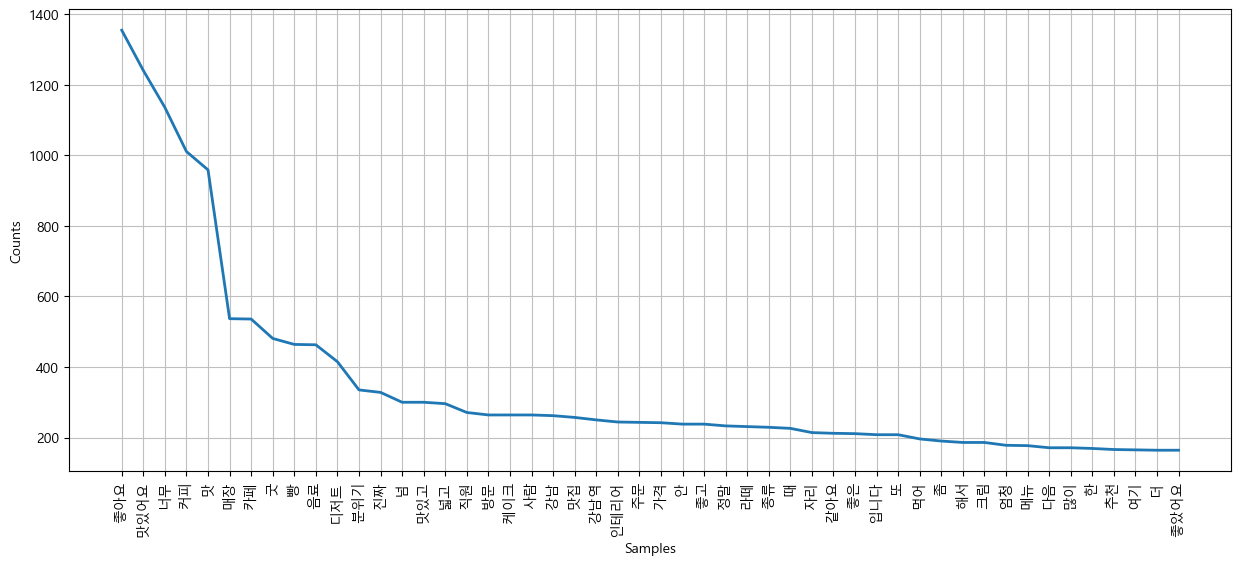

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

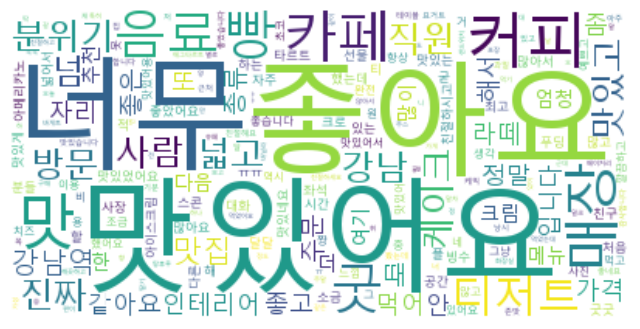

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud 생성
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling=0.2, 
                      background_color='white').generate_from_frequencies(dict(ko.vocab()))

# 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [105]:
# 가장 빈도가 낮은 50개 단어 출력
least_common_words = ko.vocab().most_common()[:-51:-1]

least_common_words

[('구워져', 1),
 ('크네', 1),
 ('빅토리아', 1),
 ('바사', 1),
 ('요담', 1),
 ('짜네요', 1),
 ('만났네요', 1),
 ('첨으로', 1),
 ('좋아집니다오', 1),
 ('긁었지만', 1),
 ('묵직하게', 1),
 ('달이', 1),
 ('다녔으나', 1),
 ('도곡', 1),
 ('느껴지는데', 1),
 ('빵결', 1),
 ('시나몬롤', 1),
 ('줗', 1),
 ('더워하니', 1),
 ('넓다는', 1),
 ('낮인데요', 1),
 ('느긋하게', 1),
 ('남깁니다대', 1),
 ('불친절한', 1),
 ('먹을거면', 1),
 ('구역', 1),
 ('작은데', 1),
 ('마땅치', 1),
 ('왔을텐데요', 1),
 ('앉거나', 1),
 ('고지', 1),
 ('비켜', 1),
 ('되어있다고', 1),
 ('싶었네요', 1),
 ('싸우자는', 1),
 ('던지', 1),
 ('치듯이', 1),
 ('패', 1),
 ('아니라면서', 1),
 ('가져가더니', 1),
 ('낚아채듯', 1),
 ('보여주면서', 1),
 ('나와있길래', 1),
 ('불친절해서', 1),
 ('나온건', 1),
 ('간거라', 1),
 ('한창', 1),
 ('티켓', 1),
 ('방아', 1),
 ('떠다니고', 1)]

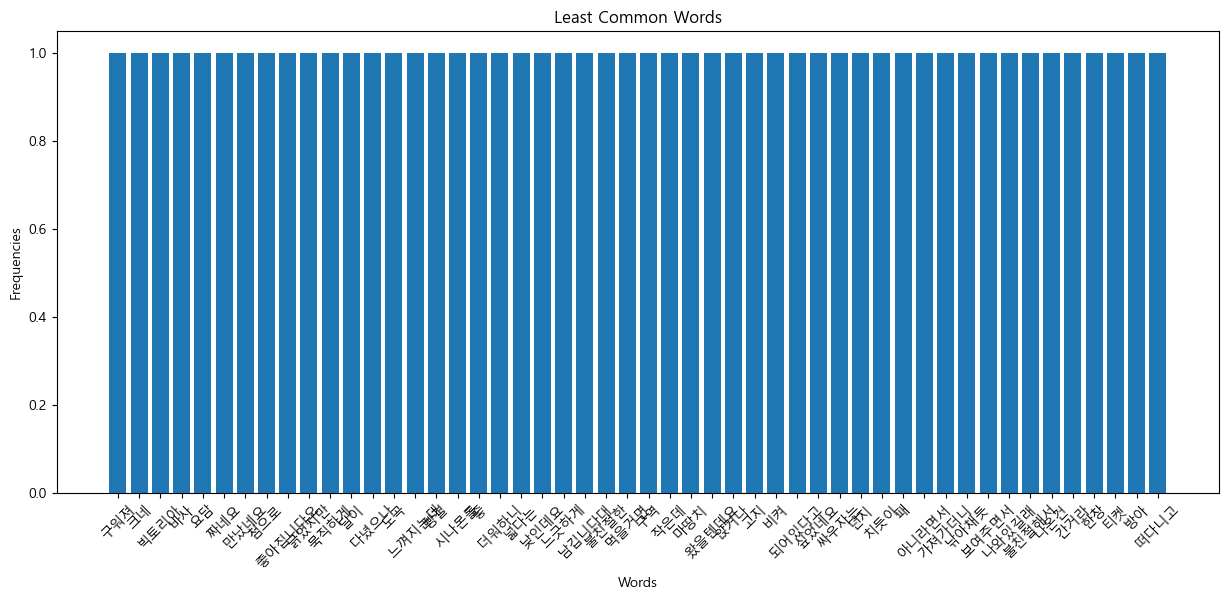

In [109]:
import matplotlib.pyplot as plt

# 가장 빈도가 낮은 50개 단어와 빈도 데이터 추출
least_common_words = ko.vocab().most_common()[:-51:-1]
words, frequencies = zip(*least_common_words)

# 그래프 출력
plt.figure(figsize=(15, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=45)  # X 축 라벨 회전
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Least Common Words')
plt.show()

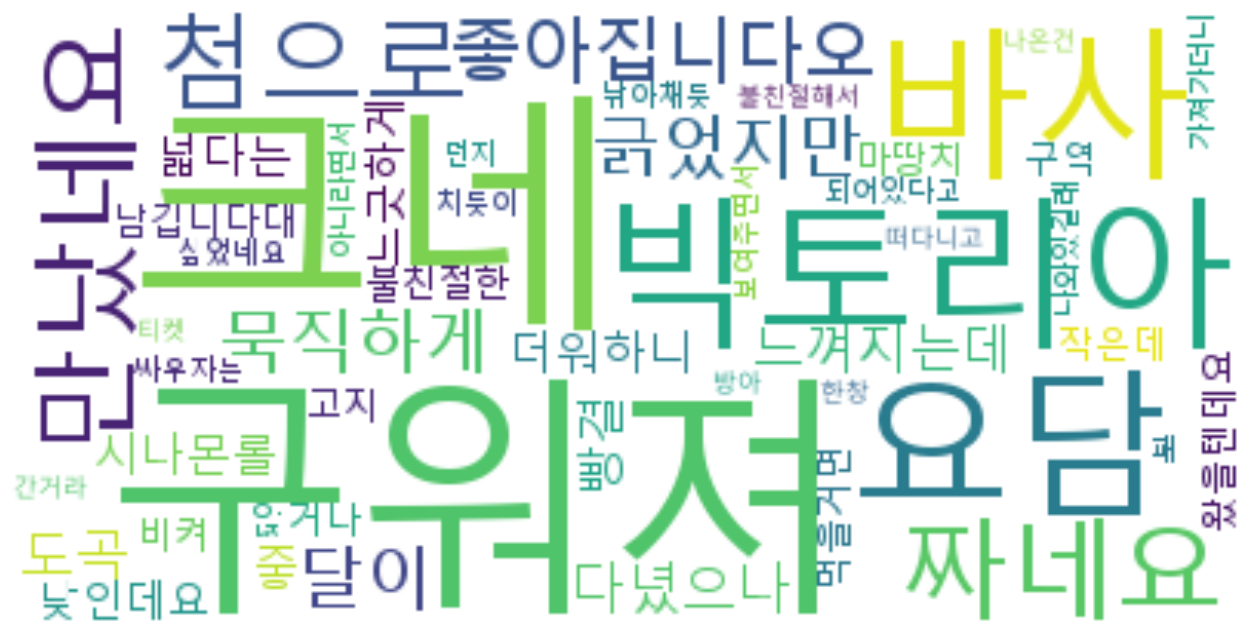

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 가장 빈도가 낮은 50개 단어를 리스트로 변환
least_common_words = ko.vocab().most_common()[:-51:-1]

# WordCloud 생성
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling=0.2, 
                      background_color='white').generate_from_frequencies(dict(least_common_words))

# 시각화
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 긍정/부정 리뷰 분류

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

# 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['filtered_text'].tolist())
print(X.shape)    

C:\Users\hlmj3\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(99, 10863)


In [124]:
print(str(index_vectorizer.vocabulary_)[:100]+"..")

{'여기/Noun': 6839, '개성/Noun': 445, '주악/Noun': 8619, '맛있어/Adjective': 3513, '욤/Noun': 7323, '벌써/Noun':..


In [125]:
print(df['filtered_text'][0])
print(X[0])

여기 개성 주악 맛있어 욤 벌써 번 째 입니다 강남 이렇게 이쁜 카페 있는줄 몰랐다 했더니 지난달 오픈 했더라구요 경치 좋구 차 향 좋구 인테리어 너무 잘 했어요 다만 공간 막 넓 직 넓 직하진 않아서 계단 좀 올랐구 풍경 바람 불면 찰랑 찰랑하는 소리내는이 있으면 참 좋겠다는 생각 들었어요 기분 좋은 식후차 하고 갑니답 다음 여자친구 데려올게요 정성 주는 차 맛있네 요약 너무 달아요 공장 형 약과 다른 개성 약과 달 않아 너무 좋았습니다 다양한 맛 양갱 수제 그런지 부드럽고 입 딱 맞았어요 다시 방문 해서 주악 먹어 보려고 해 주악 메뉴 들 다 맛있는데 다른 메뉴 들 다소 평범하게 느껴졌습니다 기본 주악 사러 한 번 더 가고싶네요 한과 디저트 너무 맛있어요 여기 진짜 존맛 근데 주말 갓 더니 자리 하나 없어서 포장 했어요 ㅜㅜ 가게 안도 예쁘구 음료 예쁜 잔 담아주시는데 넘 아쉬워용 담 평일 방문 해야겟어용 주악 맛있어용 주악 있어요 맛있 습 니당 좋아요 개성 주 악의 인식 바뀐 곳 입니다이전에 백화점 먹었을 때 기름 냄새 너무 많이 나 너무 달기 해서 왜 먹나 했는데 여기는 쫄깃달콤 고소 세 박자 넘 잘 맞고 작긴 해도 가격 사악하지 않아서 좋았어요 따듯 하게 데워서 제공 해줘서 더 좋았어요 나 알고싶은 곳 개성 주악 이렇게 맛 잇는 거 였다니 생긴지 얼마 안 됨 개성 주악 안 먹어 봄 가보자 처음 먹어 보는 개성 주악 찹쌀떡 같은 맛 났는데 그 조금 더 쫀득바싹꾸덕 느낌이었다 너무 달 않아 좋았다 원래 양갱 별로 안 좋아하는데 맛있게 먹었고 이름 까먹었는데 ㅠ 얼그레이 어쩌구 하는 디저트 너무 취향 이었다 한국인 맛있다하는 오 이 거 안 달 맛있는데의 정석 우드 인테리어 차 마시니까 힐링 그 자체 였다 주전자 있어서 차 여러 번 우려 마실 수 오란다 맛있게 먹었습니다 주악 약과 맛있었고요 기대하지 않았던 오란 다가 꽤 맛있어서 좋았습니다 마실 거리 괜찮았고 과자류 비교 적 가격 대가 낮고 한 입 거리 부담 없이 먹을 수 있었습니다 커피 외 차 종류 다양하

In [126]:
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환한다.
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)
print(X.shape)
print(X[0])

(99, 10863)
  (0, 10834)	0.0211404241935459
  (0, 10810)	0.01574338208786897
  (0, 10805)	0.013655089960392938
  (0, 10773)	0.013655089960392938
  (0, 10761)	0.00798362710122494
  (0, 10687)	0.008617631410350206
  (0, 10685)	0.014230326860545385
  (0, 10673)	0.016816911856093394
  (0, 10665)	0.01832996708341698
  (0, 10625)	0.014684683029936469
  (0, 10618)	0.016816911856093394
  (0, 10608)	0.01315679709232096
  (0, 10602)	0.014230326860545385
  (0, 10595)	0.013098271797554725
  (0, 10592)	0.008904823337010936
  (0, 10585)	0.01832996708341698
  (0, 10584)	0.010811047485116368
  (0, 10581)	0.01832996708341698
  (0, 10579)	0.016816911856093394
  (0, 10577)	0.013655089960392938
  (0, 10574)	0.01654655172591293
  (0, 10571)	0.016816911856093394
  (0, 10569)	0.01832996708341698
  (0, 10567)	0.01315679709232096
  (0, 10543)	0.013655089960392938
  :	:
  (0, 299)	0.01832996708341698
  (0, 297)	0.010811047485116368
  (0, 283)	0.01832996708341698
  (0, 277)	0.012324102712439952
  (0, 273)	0.0226

In [ ]:
# 빈도 기반 피처 선택??

# from collections import Counter

# # 예시 텍스트 데이터
# text_data = ["이것은 예시 문장입니다.", "감성 분석을 위한 텍스트 데이터입니다.", "이것은 빈도 기반 피처 선택을 위한 예제입니다."]

# # 모든 단어를 단일 리스트로 합칩니다.
# all_words = [word for sentence in text_data for word in sentence.split()]

# # 단어 빈도를 계산합니다.
# word_counts = Counter(all_words)

# # 빈도 기반 상위 N개의 단어 선택
# top_n_words = [word for word, count in word_counts.most_common(N)]

# # 희귀한 단어 제거
# filtered_text_data = [' '.join([word for word in sentence.split() if word in top_n_words]) for sentence in text_data]

In [114]:
df

,name,filtered_text
0,한과와락,여기 개성 주악 맛있어 욤 벌써 번 째 입니다 강남 이렇게 이쁜 카페 있는줄 몰랐다...
1,레뽀드라라 강남점,비엔나 커피 맛있어요 유명한 스콘 집 왔어요 분위기 좋고 스콘 맛있네요 특이한 스콘...
4,스템커피 강남점,디저트 종류 많고 카페 깨끗해서 좋아요 라떼 넘 맛있어 엽 전반 적 달달 맛 있어여...
5,알베르,대화 복잡한 강남 한 복판 이런 공간 있다니 공간 넓어서 여유 있고 편해요 아메리카...
6,호랑가시,맛있어요 일단 대형 카페 너무 좋고 빵 들 특이한게 많아요 맛 좋고 커피 맛 아주 ...
...,...,...
103,빌리엔젤 강남358타워점,강남역 곳 중 이 곳 오게 되었는데 매우 별로 네 네이버 이용 시간 마감 라스트 오...
104,잠바주스 서초삼성타운점,굿 매장 들어가자마자 과일 향 화악굿 직원 분 다소 친절하지 않음 좋아요 제로 페이...
105,어스마카롱,베이글 아메 세트 저렴해서 좋아요 마카롱 귀엽고 맛있어요 꽈배기 맛있고 베이글 좋아...
106,시티갤러리카페 본점,굿 베이글 커피 맛있어용 아이스크림 라떼 단호박 크로 플 리코 타 시티 샐러드 이렇...


### 감정 분석

In [128]:
from afinn import Afinn

afinn = Afinn()

# 여러 텍스트 데이터를 평가하는 예제
text_data = df['filtered_text']  # df는 데이터프레임 객체

for text in text_data:
    score = afinn.score(text)
    print(f"텍스트: {text}, 감정 점수: {score}")

텍스트: 여기 개성 주악 맛있어 욤 벌써 번 째 입니다 강남 이렇게 이쁜 카페 있는줄 몰랐다 했더니 지난달 오픈 했더라구요 경치 좋구 차 향 좋구 인테리어 너무 잘 했어요 다만 공간 막 넓 직 넓 직하진 않아서 계단 좀 올랐구 풍경 바람 불면 찰랑 찰랑하는 소리내는이 있으면 참 좋겠다는 생각 들었어요 기분 좋은 식후차 하고 갑니답 다음 여자친구 데려올게요 정성 주는 차 맛있네 요약 너무 달아요 공장 형 약과 다른 개성 약과 달 않아 너무 좋았습니다 다양한 맛 양갱 수제 그런지 부드럽고 입 딱 맞았어요 다시 방문 해서 주악 먹어 보려고 해 주악 메뉴 들 다 맛있는데 다른 메뉴 들 다소 평범하게 느껴졌습니다 기본 주악 사러 한 번 더 가고싶네요 한과 디저트 너무 맛있어요 여기 진짜 존맛 근데 주말 갓 더니 자리 하나 없어서 포장 했어요 ㅜㅜ 가게 안도 예쁘구 음료 예쁜 잔 담아주시는데 넘 아쉬워용 담 평일 방문 해야겟어용 주악 맛있어용 주악 있어요 맛있 습 니당 좋아요 개성 주 악의 인식 바뀐 곳 입니다이전에 백화점 먹었을 때 기름 냄새 너무 많이 나 너무 달기 해서 왜 먹나 했는데 여기는 쫄깃달콤 고소 세 박자 넘 잘 맞고 작긴 해도 가격 사악하지 않아서 좋았어요 따듯 하게 데워서 제공 해줘서 더 좋았어요 나 알고싶은 곳 개성 주악 이렇게 맛 잇는 거 였다니 생긴지 얼마 안 됨 개성 주악 안 먹어 봄 가보자 처음 먹어 보는 개성 주악 찹쌀떡 같은 맛 났는데 그 조금 더 쫀득바싹꾸덕 느낌이었다 너무 달 않아 좋았다 원래 양갱 별로 안 좋아하는데 맛있게 먹었고 이름 까먹었는데 ㅠ 얼그레이 어쩌구 하는 디저트 너무 취향 이었다 한국인 맛있다하는 오 이 거 안 달 맛있는데의 정석 우드 인테리어 차 마시니까 힐링 그 자체 였다 주전자 있어서 차 여러 번 우려 마실 수 오란다 맛있게 먹었습니다 주악 약과 맛있었고요 기대하지 않았던 오란 다가 꽤 맛있어서 좋았습니다 마실 거리 괜찮았고 과자류 비교 적 가격 대가 낮고 한 입 거리 부담 없이 먹을 수 있었습니다 커피 외 차 종

In [129]:
# 감성 사전 파일을 읽어서 DataFrame을 생성
f = pd.read_csv("C:\\Users\\hlmj3\\Desktop\\crawling\\KnuSentiLex\\SentiWord_Dict.txt", sep='\t', names=['word', 'polarity'])

# Series로 변환
sentiment_series = pd.Series(f['polarity'].values, index=f['word'].values)

# 사전형으로 변환
sentiment_dictionary = sentiment_series.to_dict()

In [130]:
s = None  # Python에서 None은 null과 유사한 의미를 가집니다.

result = str(len(s)) if s is not None else "0"

print(result)

0


In [139]:
from konlpy.tag import Okt

# Okt 객체 생성
okt = Okt()

# 텍스트 데이터에서 명사와 형용사 추출
def extract_nouns_adjectives(text):
    tagged = okt.pos(text)
    nouns_adjectives = [word for word, pos in tagged if pos in ['Noun', 'Adjective']]
    return nouns_adjectives

# 'filtered_text' 열에서 명사와 형용사 추출하여 'nouns_adjectives' 열에 저장
result_df['nouns_adjectives'] = result_df['filtered_text'].apply(extract_nouns_adjectives)

In [142]:
from konlpy.tag import Okt

# Okt 객체 생성
okt = Okt()

# 형용사를 명사로 변경하는 함수
def lemmatize_adjectives(text):
    morphemes = okt.pos(text, norm=True, stem=True)
    words = []
    for word, pos in morphemes:
        if pos in ['Adjective', 'Verb']:
            # 형용사 또는 동사일 경우, '명사'로 변경
            words.append(word + '다')
        else:
            words.append(word)
    return ' '.join(words)

# DataFrame의 'filtered_text' 열에 함수 적용
result_df['filtered_text'] = result_df['filtered_text'].apply(lemmatize_adjectives)

# 'filtered_text' 열에서 빈 텍스트 제거
result_df = result_df[result_df['filtered_text'] != '']

In [143]:
result_df

,filtered_text,nouns,adjectives,nouns_adjectives
0,여기 개성 주악 맛있다다 욤 벌써 번 째다다 이다다 강남 이렇게 이쁘다다 카페 있다...,여기 개성 주악 맛있어 욤 벌써 번 입니다 강남 이쁜 카페 있는줄 지난달 오픈 경치...,Adjective Adjective Adjective Adjective Adject...,"[여기, 개성, 주악, 맛있어, 욤, 벌써, 번, 입니다, 강남, 이쁜, 카페, 있..."
1,비엔나 커피 맛있다다 유명하다다 스콘 집 오다다 분위기 좋다다 스콘 맛있다다 특이하...,비엔나 커피 맛있어요 유명한 스콘 집 분위기 좋고 스콘 맛있네요 특이한 스콘 많아요...,Adjective Adjective Adjective Adjective Adject...,"[비엔나, 커피, 맛있어요, 유명한, 스콘, 집, 분위기, 좋고, 스콘, 맛있네요,..."
4,디저트 종류 많다다 카페 깨끗하다다 좋다다 라떼 넘다다 맛있다다 엽 전반 적 달달 ...,NaN,Adjective Adjective Adjective Adjective Adject...,"[디저트, 종류, 많고, 카페, 깨끗해서, 좋아요, 라떼, 맛있어, 엽, 전반, 적..."
5,대화 복잡하다다 강남 하다다 복판 이렇다다 공간 있다다 공간 넓다다 여유 있다다 편...,NaN,Adjective Adjective Adjective Adjective Adject...,"[대화, 복잡한, 강남, 복판, 이런, 공간, 있다니, 공간, 넓어서, 여유, 있고..."
6,맛있다다 일단 대형 카페 너무 좋다다 빵 들다다 특이하다다 많다다 맛 좋다다 커피 ...,NaN,Adjective Adjective Adjective Adjective Adject...,"[맛있어요, 일단, 대형, 카페, 좋고, 빵, 특이한게, 많아요, 맛, 좋고, 커피..."
...,...,...,...,...
103,강남역 곳 중 이 곳 오다다 되어다다 매우 별로 네 네이버 이용 시간 마감 라스트 ...,NaN,Adjective Adjective Adjective Adjective Adject...,"[강남역, 곳, 중, 이, 곳, 매우, 별로, 네, 네이버, 이용, 시간, 마감, ..."
104,굿 매장 들어가다다 과일 향 화악굿 직원 분 다소 친절하다다 않다다 좋다다 제로 페...,NaN,Adjective Adjective Adjective Adjective Adject...,"[굿, 매장, 과일, 향, 화악굿, 직원, 분, 다소, 친절하지, 좋아요, 제로, ..."
105,베이글 아메 세트 저렴하다다 좋다다 마카롱 귀엽다다 맛있다다 꽈배기 맛있다다 베이글...,NaN,Adjective Adjective Adjective Adjective Adject...,"[베이글, 아메, 세트, 저렴해서, 좋아요, 마카롱, 귀엽고, 맛있어요, 꽈배기, ..."
106,굿 베이글 커피 맛있다다 아이스크림 라떼 단호박 크다다 플 리코 타 시티 샐러드 이...,NaN,Adjective Adjective Adjective Adjective Adject...,"[굿, 베이글, 커피, 맛있어용, 아이스크림, 라떼, 단호박, 리코, 타, 시티, ..."


In [147]:
# 감성 분석을 수행하고 sent_score 부여
total = []
for i, words in enumerate(result_df['filtered_text']):
    sent_score = 0
    words = words.split(' ')
    for word in words:
        if len(word) <= 1:
            continue
        elif word not in sentiment_dictionary:
            continue
        else:
            sent_score += float(sentiment_dictionary[word])
    total.append(sent_score / len(words))

result_df['sent_score'] = total

# sent_score이 0인 리뷰 제외
result_df = result_df[result_df['sent_score'] != 0]

# 결과를 result_df에 저장
result_df = result_df

In [148]:
result_df

,filtered_text,nouns,adjectives,nouns_adjectives,sent_score
0,여기 개성 주악 맛있다다 욤 벌써 번 째다다 이다다 강남 이렇게 이쁘다다 카페 있다...,여기 개성 주악 맛있어 욤 벌써 번 입니다 강남 이쁜 카페 있는줄 지난달 오픈 경치...,Adjective Adjective Adjective Adjective Adject...,"[여기, 개성, 주악, 맛있어, 욤, 벌써, 번, 입니다, 강남, 이쁜, 카페, 있...",0.021985
1,비엔나 커피 맛있다다 유명하다다 스콘 집 오다다 분위기 좋다다 스콘 맛있다다 특이하...,비엔나 커피 맛있어요 유명한 스콘 집 분위기 좋고 스콘 맛있네요 특이한 스콘 많아요...,Adjective Adjective Adjective Adjective Adject...,"[비엔나, 커피, 맛있어요, 유명한, 스콘, 집, 분위기, 좋고, 스콘, 맛있네요,...",0.021715
5,대화 복잡하다다 강남 하다다 복판 이렇다다 공간 있다다 공간 넓다다 여유 있다다 편...,NaN,Adjective Adjective Adjective Adjective Adject...,"[대화, 복잡한, 강남, 복판, 이런, 공간, 있다니, 공간, 넓어서, 여유, 있고...",0.041667
6,맛있다다 일단 대형 카페 너무 좋다다 빵 들다다 특이하다다 많다다 맛 좋다다 커피 ...,NaN,Adjective Adjective Adjective Adjective Adject...,"[맛있어요, 일단, 대형, 카페, 좋고, 빵, 특이한게, 많아요, 맛, 좋고, 커피...",0.016033
7,무게 달다다 가격 측정 하다다 시스템 신 박하 재미있다다 발상 전환 블루베리 케이크...,NaN,Adjective Adjective Adjective Adjective Adject...,"[무게, 가격, 측정, 시스템, 신, 박하, 재미있었네요, 발상, 전환, 블루베리,...",0.024038
...,...,...,...,...,...
103,강남역 곳 중 이 곳 오다다 되어다다 매우 별로 네 네이버 이용 시간 마감 라스트 ...,NaN,Adjective Adjective Adjective Adjective Adject...,"[강남역, 곳, 중, 이, 곳, 매우, 별로, 네, 네이버, 이용, 시간, 마감, ...",0.006791
104,굿 매장 들어가다다 과일 향 화악굿 직원 분 다소 친절하다다 않다다 좋다다 제로 페...,NaN,Adjective Adjective Adjective Adjective Adject...,"[굿, 매장, 과일, 향, 화악굿, 직원, 분, 다소, 친절하지, 좋아요, 제로, ...",0.005556
105,베이글 아메 세트 저렴하다다 좋다다 마카롱 귀엽다다 맛있다다 꽈배기 맛있다다 베이글...,NaN,Adjective Adjective Adjective Adjective Adject...,"[베이글, 아메, 세트, 저렴해서, 좋아요, 마카롱, 귀엽고, 맛있어요, 꽈배기, ...",0.032609
106,굿 베이글 커피 맛있다다 아이스크림 라떼 단호박 크다다 플 리코 타 시티 샐러드 이...,NaN,Adjective Adjective Adjective Adjective Adject...,"[굿, 베이글, 커피, 맛있어용, 아이스크림, 라떼, 단호박, 리코, 타, 시티, ...",0.011527


긍정적: 점수가 1 이상
중립적: 점수가 0 또는 매우 가까운 값
부정적: 점수가 -1 이하

In [156]:
result_df.sort_values(by='sent_score', ascending=False)

,filtered_text,nouns,adjectives,nouns_adjectives,sent_score
5,대화 복잡하다다 강남 하다다 복판 이렇다다 공간 있다다 공간 넓다다 여유 있다다 편...,NaN,Adjective Adjective Adjective Adjective Adject...,"[대화, 복잡한, 강남, 복판, 이런, 공간, 있다니, 공간, 넓어서, 여유, 있고...",0.041667
42,디저트 저렴하다다 편 아니다다 체리 빙수 가격 값 하다다 것 같다다 신선하다다 체리...,NaN,Adjective Adjective Adjective Adjective Adject...,"[디저트, 저렴한, 편, 아닌데, 체리, 빙수, 가격, 값, 것, 같아요, 신선한,...",0.038786
87,엄마 환갑 생신 용이 정말 특별하다다 케이크 해드리다다 싶다다 정말 많이 찾다다 앙...,NaN,Adjective Adjective Adjective Adjective Adject...,"[엄마, 환갑, 생신, 용이, 정말, 특별한, 케이크, 정말, 앙금, 플라워, 케익...",0.038328
17,재 방문 카페 프렌치토스트 계 에르메스 경험 딸기 밀크 티 조화로움 그 자체 인테리...,NaN,Adjective Adjective Adjective Adjective Adject...,"[재, 방문, 카페, 프렌치토스트, 계, 에르메스, 경험, 딸기, 밀크, 티, 조화...",0.036246
101,색다르다다 메뉴 있다다 원두 선택 하다다 수 있다다 장소 넓다다 너무 좋다다 다음 ...,NaN,Adjective Adjective Adjective Adjective Adject...,"[색다른, 메뉴, 있어요, 원두, 선택, 수, 있고요, 장소, 넓고, 좋아요, 다음...",0.033333
...,...,...,...,...,...
37,치폴레 매콤 하다다 그릭 요거트 고구마 맛있다다 브런치 먹다다 가다다 블루베리 요거...,NaN,Adjective Adjective Adjective Adjective Adject...,"[치폴레, 매콤, 그릭, 요거트, 고구마, 맛있어요, 브런치, 블루베리, 요거트, ...",-0.003115
46,ㅇㅇ 맛있다다 좋다다 아이스크림 언제 퍼 얼리다다 꽝꽝 얼다다 먹기 어렵다다 히끗히...,NaN,Adjective Adjective Adjective Adjective Adject...,"[맛있어요, 좋아요, 아이스크림, 언제, 먹기, 어려웠고요, 히끗히끗, 얼음, 인절...",-0.003306
95,디저트 맛있다다 매장 크다다 깔끔하다다 좋다다 흠 그냥 직원 들다다 친절하다다 느낌...,NaN,Adjective Adjective Adjective Adjective Adject...,"[디저트, 맛있어요, 매장, 깔끔해서, 좋아요, 흠, 그냥, 직원, 친절한, 느낌,...",-0.003861
29,좋다다 매장 넓다다 좋다다 친절하다다 맛있다다 굿 강남역 번 출구 나오다다 바로 오...,NaN,Adjective Adjective Adjective Adjective Adject...,"[조아요, 매장, 넓어서, 좋고, 친절하고, 맛있어요, 굿, 강남역, 번, 출구, ...",-0.005666


In [155]:
from sentence_transformers import SentenceTransformer,util

embedder = SentenceTransformer("jhgan/ko-sbert-sts")
result_one_embeddings = embedder.encode(k)

ModuleNotFoundError: No module named 'sentence_transformers'

In [157]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# StandardScaler를 사용하여 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(result_df[['sent_score']])

# DBScan 모델 생성 및 학습
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(scaled_features)

# 결과를 DataFrame에 추가
result_df['cluster'] = dbscan.labels_

C:\Users\hlmj3\AppData\Local\Temp\ipykernel_26968\1778556305.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['cluster'] = dbscan.labels_


In [158]:
result_df

,filtered_text,nouns,adjectives,nouns_adjectives,sent_score,cluster
0,여기 개성 주악 맛있다다 욤 벌써 번 째다다 이다다 강남 이렇게 이쁘다다 카페 있다...,여기 개성 주악 맛있어 욤 벌써 번 입니다 강남 이쁜 카페 있는줄 지난달 오픈 경치...,Adjective Adjective Adjective Adjective Adject...,"[여기, 개성, 주악, 맛있어, 욤, 벌써, 번, 입니다, 강남, 이쁜, 카페, 있...",0.021985,0
1,비엔나 커피 맛있다다 유명하다다 스콘 집 오다다 분위기 좋다다 스콘 맛있다다 특이하...,비엔나 커피 맛있어요 유명한 스콘 집 분위기 좋고 스콘 맛있네요 특이한 스콘 많아요...,Adjective Adjective Adjective Adjective Adject...,"[비엔나, 커피, 맛있어요, 유명한, 스콘, 집, 분위기, 좋고, 스콘, 맛있네요,...",0.021715,0
5,대화 복잡하다다 강남 하다다 복판 이렇다다 공간 있다다 공간 넓다다 여유 있다다 편...,NaN,Adjective Adjective Adjective Adjective Adject...,"[대화, 복잡한, 강남, 복판, 이런, 공간, 있다니, 공간, 넓어서, 여유, 있고...",0.041667,-1
6,맛있다다 일단 대형 카페 너무 좋다다 빵 들다다 특이하다다 많다다 맛 좋다다 커피 ...,NaN,Adjective Adjective Adjective Adjective Adject...,"[맛있어요, 일단, 대형, 카페, 좋고, 빵, 특이한게, 많아요, 맛, 좋고, 커피...",0.016033,0
7,무게 달다다 가격 측정 하다다 시스템 신 박하 재미있다다 발상 전환 블루베리 케이크...,NaN,Adjective Adjective Adjective Adjective Adject...,"[무게, 가격, 측정, 시스템, 신, 박하, 재미있었네요, 발상, 전환, 블루베리,...",0.024038,0
...,...,...,...,...,...,...
103,강남역 곳 중 이 곳 오다다 되어다다 매우 별로 네 네이버 이용 시간 마감 라스트 ...,NaN,Adjective Adjective Adjective Adjective Adject...,"[강남역, 곳, 중, 이, 곳, 매우, 별로, 네, 네이버, 이용, 시간, 마감, ...",0.006791,0
104,굿 매장 들어가다다 과일 향 화악굿 직원 분 다소 친절하다다 않다다 좋다다 제로 페...,NaN,Adjective Adjective Adjective Adjective Adject...,"[굿, 매장, 과일, 향, 화악굿, 직원, 분, 다소, 친절하지, 좋아요, 제로, ...",0.005556,0
105,베이글 아메 세트 저렴하다다 좋다다 마카롱 귀엽다다 맛있다다 꽈배기 맛있다다 베이글...,NaN,Adjective Adjective Adjective Adjective Adject...,"[베이글, 아메, 세트, 저렴해서, 좋아요, 마카롱, 귀엽고, 맛있어요, 꽈배기, ...",0.032609,0
106,굿 베이글 커피 맛있다다 아이스크림 라떼 단호박 크다다 플 리코 타 시티 샐러드 이...,NaN,Adjective Adjective Adjective Adjective Adject...,"[굿, 베이글, 커피, 맛있어용, 아이스크림, 라떼, 단호박, 리코, 타, 시티, ...",0.011527,0
